#**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd

#**Loading the Churn Dataset**

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

**Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.**

In [2]:
churn_data = pd.read_csv('Churn_Modelling.csv', delimiter = ',')
churn_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#**Accessing the Column Names in the Dataset**

In [3]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#**Setting Column as a Index**

In [4]:
churn_data = churn_data.set_index('RowNumber')
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#**Finding the Shape of the Dataset**

In [5]:
churn_data.shape

(10000, 13)

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


#**Checking Missing Values**

In [7]:
churn_data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **Some Columns are Totally Unproductive so let's Remove them**

In [8]:
churn_data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [10]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
churn_data.shape

(10000, 11)

#**Some Visualizations**

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
df = churn_data.copy()

In [13]:
def plot_univariate(col):
    if(df[col].nunique()>2):
        plt.figure(figsize=(10,7))
        h = 0.15
        rot=90
    else:
        plt.figure(figsize=(6,6))
        h = 0.5
        rot=0
    plot = sns.countplot(x = df[col], palette='pastel')
    
    for bars in plot.containers:
        for p in bars:
            plot.annotate(format(p.get_height()), (p.get_x() + p.get_width()*0.5, p.get_height()), 
                    ha = 'center', va = 'bottom')
            plot.annotate(f'{p.get_height()*100/df[col].shape[0] : .1f}%', (p.get_x() + p.get_width()*0.5, h*p.get_height()), 
                    ha = 'center', va = 'bottom', rotation=rot) 

In [14]:
def plot_bivariate(col,hue):    
    if(df[col].nunique()>5):
        plt.figure(figsize=(20,10))   
        rot=90
    else:
        plt.figure(figsize=(10,7))
        rot=0
    def percentage(ax):
        heights = [[p.get_height() for p in bars] for bars in ax.containers] #Get the counts of each bar, make arrays when more than one in group
        for bars in ax.containers:
            for i, p in enumerate(bars):
                total = sum(group[i] for group in heights) #Sum total of each group
                percentage = (100 * p.get_height() / total) #Calculate % to annotate
                ax.annotate(format(p.get_height()), (p.get_x() + p.get_width()*0.5,0.8*p.get_height()), 
                    ha = 'center', va = 'bottom', rotation=0)
                if(percentage>25.0):
                    percentage = f'{percentage:.1f}%'
                    ax.annotate( percentage, (p.get_x() + p.get_width()*0.5, 0.25*p.get_height()), ha='center', va='center', rotation=rot)


    plot = sns.countplot(x=df[col], hue=df[hue],palette='pastel')
    percentage(plot) 

In [15]:
def spearman(df,hue):
    feature = []
    correlation = []
    result = []
    for col in df.columns:
        corr, p = stats.spearmanr(df[col], df[hue])
        feature.append(col)
        correlation.append(corr)
        alpha = 0.05
        if p > alpha:
            result.append('No correlation (fail to reject H0)')
        else:
            result.append('Some correlation (reject H0)')
    c = pd.DataFrame({'Feature Name':feature,'correlation coefficient':correlation, 'Inference':result})
    display(c)

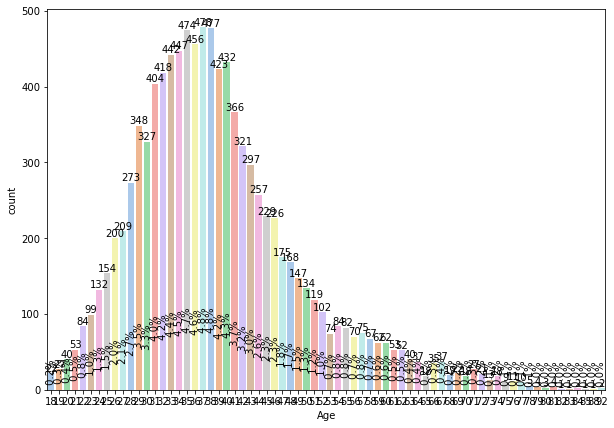

In [17]:
plot_univariate('Age')

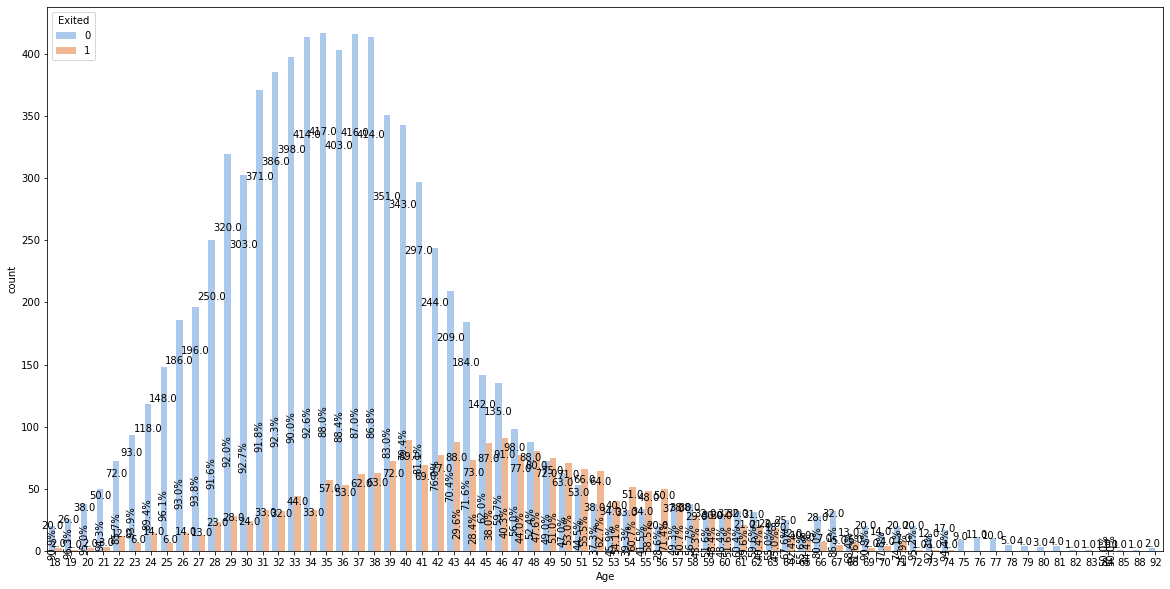

In [18]:
plot_bivariate('Age','Exited')

In [19]:
spearman(churn_data,'Age')

,Feature Name,correlation coefficient,Inference
0,CreditScore,-0.007974,No correlation (fail to reject H0)
1,Geography,0.035351,Some correlation (reject H0)
2,Gender,-0.029785,Some correlation (reject H0)
3,Age,1.000000,Some correlation (reject H0)
4,Tenure,-0.010405,No correlation (fail to reject H0)
5,Balance,0.033304,Some correlation (reject H0)
6,NumOfProducts,-0.058566,Some correlation (reject H0)
7,HasCrCard,-0.015278,No correlation (fail to reject H0)
8,IsActiveMember,0.039839,Some correlation (reject H0)
9,EstimatedSalary,-0.002431,No correlation (fail to reject H0)


# **Label Encoding of Categorical Variables**

Label Encoding means converting categorical features into numerical values. So that they can be fitted by machine learning models which only take numerical data.

**Example:** Suppose we have a column Height in some dataset that has elements as Tall, Medium, and short. To convert this categorical column into a numerical column we will apply label encoding to this column. After applying label encoding, the Height column is converted into a numerical column having elements 0,1, and 2 where 0 is the label for tall, 1 is the label for medium, and 2 is the label for short height.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn_data[['Geography', 'Gender']] = churn_data[['Geography', 'Gender']].apply(le.fit_transform)

In [21]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


#**Seperating Label from Data**

In [22]:
y = churn_data.Exited
X = churn_data.drop(['Exited'],axis=1)

In [23]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [24]:
y

RowNumber
1        1
2        0
3        1
4        0
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    0
Name: Exited, Length: 10000, dtype: int64

#**Splitting the Data into Training and Testing**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [26]:
print("Shape of the X_train", X_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the y_test", y_test.shape)

Shape of the X_train (7000, 10)
Shape of the X_test (3000, 10)
Shape of the y_train (7000,)
Shape of the y_test (3000,)


# **Feature Scaling:**
The result of **standardization** (or **Z-Score normalization**) is that the features will be re scaled so that they'll have the properties of a standard normal distribution with: 
$$\mu = 0$$
And
$$\sigma = 1$$

Where $\mu$ is the mean(average) and $\sigma$ is the standard deviation from the mean; standard scores (also called **Z** scores) of the sampels are calculated as follows: 
$$z = \frac{x - \mu}{\sigma}$$

***

# **About Min-Max Scaling**

An alternative approach to **Z-Score** normalization (or called standardization) is the so-called **Min-Max Scaling** (often also simply called **Normalization** - a common cause for ambiguities)

In this approach, the data is scaled to a fixed range - usually `[0, 1]`. 
The cost of having this bounded range - in contrast to standrdization - is that we will end up with smaaller standard deviations, which can suppress the effect of outliers. 

**Note**:

If the dataset have lot's of outliers, and the algorithms are sensitive to outliers, please use `Min-Max Scaler`

A `Min-Max Scaling` is typically done via the foloowing equation: 

$$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$

$X_i$ is the $i^{th}$ sample of dataset. 


# **Z-Score Standardization or Min-Max Scaling**

"Standardization or Min-Max scaling"? - There is no obvious answer to this question: it really depends on the application. 

However this doesn't mean that `Min-Max Scaling` is not useful at all, A popular application is `image processing`, where pixel intensities have to be normalized to fit withint a certain range (i.e., `[0, 255]` for the RGB colour range). Also, typical _Neural Network_ Algorithm require data that on a `0 - 1` scale. 

#**Need for Normalization**
For example, consider a data set containing two features, age(x1), and income(x2). Where age ranges from 0–100, while income ranges from 0–20,000 and higher. Income is about 1,000 times larger than age and ranges from 20,000–500,000. So, these two features are in very different ranges. When we do further analysis, like multivariate linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor.

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Building the ANN Model**

In [28]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [29]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# **Compiling and Fitting the Model**

In [30]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 1)

Epoch 1/100
700/700 [==============================] - 1s 827us/step - loss: 0.4823 - accuracy: 0.7914
Epoch 2/100
700/700 [==============================] - 1s 805us/step - loss: 0.4314 - accuracy: 0.7926
Epoch 3/100
700/700 [==============================] - 1s 782us/step - loss: 0.4248 - accuracy: 0.8064
Epoch 4/100
700/700 [==============================] - 1s 827us/step - loss: 0.4204 - accuracy: 0.8219
Epoch 5/100
700/700 [==============================] - 1s 805us/step - loss: 0.4172 - accuracy: 0.8276
Epoch 6/100
700/700 [==============================] - 1s 805us/step - loss: 0.4138 - accuracy: 0.8314
Epoch 7/100
700/700 [==============================] - 1s 803us/step - loss: 0.4115 - accuracy: 0.8330
Epoch 8/100
700/700 [==============================] - 1s 806us/step - loss: 0.4098 - accuracy: 0.8343
Epoch 9/100
700/700 [==============================] - 1s 805us/step - loss: 0.4083 - accuracy: 0.8330
Epoch 10/100
700/700 [==============================] - 1s 782us/step - l

700/700 [==============================] - 1s 805us/step - loss: 0.3865 - accuracy: 0.8401
Epoch 80/100
700/700 [==============================] - 1s 872us/step - loss: 0.3868 - accuracy: 0.8411
Epoch 81/100
700/700 [==============================] - 1s 827us/step - loss: 0.3860 - accuracy: 0.8404
Epoch 82/100
700/700 [==============================] - 1s 827us/step - loss: 0.3857 - accuracy: 0.8384
Epoch 83/100
700/700 [==============================] - 1s 805us/step - loss: 0.3855 - accuracy: 0.8417
Epoch 84/100
700/700 [==============================] - 1s 760us/step - loss: 0.3858 - accuracy: 0.8407
Epoch 85/100
700/700 [==============================] - 1s 782us/step - loss: 0.3859 - accuracy: 0.8424
Epoch 86/100
700/700 [==============================] - 1s 782us/step - loss: 0.3849 - accuracy: 0.8404
Epoch 87/100
700/700 [==============================] - 1s 805us/step - loss: 0.3839 - accuracy: 0.8413
Epoch 88/100
700/700 [==============================] - 1s 760us/step - loss:

#**Testing the Model**

In [31]:
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

700/700 [==============================] - 1s 782us/step - loss: 0.3342 - accuracy: 0.8631
Train score: 0.33418112993240356
Train accuracy: 0.8631428480148315
********************
300/300 [==============================] - 0s 784us/step - loss: 0.3537 - accuracy: 0.8550
Test score: 0.35368815064430237
Test accuracy: 0.8550000190734863


#**Confusion Matrix**

### * **Accuracy** 
number of examples correctly predicted / total number of examples  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
target_names = ['Retained', 'Closed']
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2320   95]
 [ 340  245]]


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 15.0, 'Predicted label')

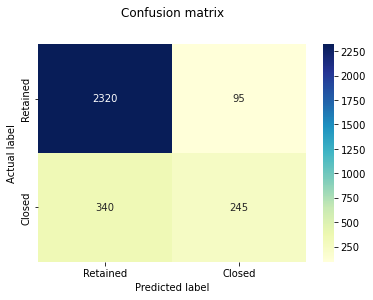

In [34]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**Classification Report**

### * **True Positive Rate**
number of samples actually and predicted as  `Positive` / total number of samples actually `Positive`  
Also called **Sensitivity or Recall**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


### * **Positive Predictive Value**
number of samples actually and predicted as  `Positive` / total number of samples predicted as `Positive`  
Also called **Precision**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)

### * **F1 score**
Harmonic Mean of Precision and Recall.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [35]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Retained       0.87      0.96      0.91      2415
      Closed       0.72      0.42      0.53       585

    accuracy                           0.85      3000
   macro avg       0.80      0.69      0.72      3000
weighted avg       0.84      0.85      0.84      3000



#**ROC curve**

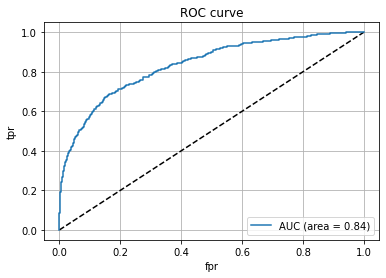

In [36]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

In [37]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8360007786094743

# **Finetuing the Network**

In [38]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [16, 32],
              'epochs': [50, 100],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy', cv = 2) #,cv = 10
grid_search = grid_search.fit(X_train, y_train,verbose = 1)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/50


C:\Users\Rakesh\AppData\Local\Temp/ipykernel_7944/1091589377.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier)


219/219 [==============================] - 1s 1ms/step - loss: 0.6018 - accuracy: 0.7946
Epoch 2/50
219/219 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.7966
Epoch 3/50
219/219 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7966
Epoch 4/50
219/219 [==============================] - 0s 932us/step - loss: 0.4351 - accuracy: 0.7966
Epoch 5/50
219/219 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.7966
Epoch 6/50
219/219 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.7966
Epoch 7/50
219/219 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.7966
Epoch 8/50
219/219 [==============================] - 0s 932us/step - loss: 0.4303 - accuracy: 0.7966
Epoch 9/50
219/219 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.7966
Epoch 10/50
219/219 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.7966
Epoch 

219/219 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8346
Epoch 32/50
219/219 [==============================] - 0s 932us/step - loss: 0.4005 - accuracy: 0.8351
Epoch 33/50
219/219 [==============================] - 0s 932us/step - loss: 0.4010 - accuracy: 0.8349
Epoch 34/50
219/219 [==============================] - 0s 860us/step - loss: 0.4000 - accuracy: 0.8369
Epoch 35/50
219/219 [==============================] - 0s 932us/step - loss: 0.3988 - accuracy: 0.8366
Epoch 36/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8357
Epoch 37/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8354
Epoch 38/50
219/219 [==============================] - 0s 932us/step - loss: 0.3983 - accuracy: 0.8354
Epoch 39/50
219/219 [==============================] - 0s 932us/step - loss: 0.3993 - accuracy: 0.8354
Epoch 40/50
219/219 [==============================] - 0s 932us/step - loss: 0.3974 - accur

219/219 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8237
Epoch 12/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8229
Epoch 13/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8231
Epoch 14/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8243
Epoch 15/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8294
Epoch 16/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8326
Epoch 17/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3821 - accuracy: 0.8329
Epoch 18/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8354
Epoch 19/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8369
Epoch 20/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8397
Ep

219/219 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8377
Epoch 42/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8360
Epoch 43/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8380
Epoch 44/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8389
Epoch 45/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4046 - accuracy: 0.8369
Epoch 46/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8374
Epoch 47/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8366
Epoch 48/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8389
Epoch 49/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4046 - accuracy: 0.8380
Epoch 50/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 

219/219 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8286
Epoch 22/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8300
Epoch 23/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8306
Epoch 24/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8311
Epoch 25/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8317
Epoch 26/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8320
Epoch 27/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8320
Epoch 28/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8317
Epoch 29/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8326
Epoch 30/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4069 - accuracy: 

219/219 [==============================] - 1s 1ms/step - loss: 0.6097 - accuracy: 0.7954
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.7966
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.7966
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7966
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7966
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7966
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.7966
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.7966
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.7966
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8034
E

219/219 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8371
Epoch 82/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8371
Epoch 83/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8351
Epoch 84/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8351
Epoch 85/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8360
Epoch 86/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8366
Epoch 87/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8380
Epoch 88/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8346
Epoch 89/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8363
Epoch 90/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 

219/219 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8329
Epoch 62/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8340
Epoch 63/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8357
Epoch 64/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8343
Epoch 65/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8360
Epoch 66/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8346
Epoch 67/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8369
Epoch 68/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8354
Epoch 69/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8369
Epoch 70/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 

110/110 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8357
Epoch 42/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8366
Epoch 43/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8363
Epoch 44/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8360
Epoch 45/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8351
Epoch 46/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8363
Epoch 47/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8360
Epoch 48/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8331
Epoch 49/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8357
Epoch 50/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8363
Ep

110/110 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8286
Epoch 23/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4156 - accuracy: 0.8303
Epoch 24/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8297
Epoch 25/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8323
Epoch 26/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8331
Epoch 27/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8340
Epoch 28/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8351
Epoch 29/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8363
Epoch 30/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8371
Epoch 31/50
110/110 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8366
Ep

110/110 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7966
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7966
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8006
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8149
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.8189
Epoch 8/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8183
Epoch 9/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8209
Epoch 10/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8209
Epoch 11/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8223
Epoch 12/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8206

110/110 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8583
Epoch 84/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8577
Epoch 85/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8597
Epoch 86/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8580
Epoch 87/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8597
Epoch 88/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8586
Epoch 89/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8597
Epoch 90/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8577
Epoch 91/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8591
Epoch 92/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 

110/110 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8380
Epoch 64/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.8386
Epoch 65/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.8386
Epoch 66/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3863 - accuracy: 0.8351
Epoch 67/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3861 - accuracy: 0.8386
Epoch 68/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8383
Epoch 69/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.8386
Epoch 70/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8389
Epoch 71/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.8389
Epoch 72/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3849 - accuracy: 

110/110 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8377
Epoch 44/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8377
Epoch 45/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8374
Epoch 46/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8389
Epoch 47/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8380
Epoch 48/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8386
Epoch 49/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8377
Epoch 50/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8386
Epoch 51/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8391
Epoch 52/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 

110/110 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.8231
Epoch 24/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8257
Epoch 25/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8251
Epoch 26/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8260
Epoch 27/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8274
Epoch 28/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8274
Epoch 29/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8283
Epoch 30/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8291
Epoch 31/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8309
Epoch 32/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 

438/438 [==============================] - 1s 1ms/step - loss: 0.4354 - accuracy: 0.7926
Epoch 4/50
438/438 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.7926
Epoch 5/50
438/438 [==============================] - 0s 930us/step - loss: 0.4283 - accuracy: 0.7926
Epoch 6/50
438/438 [==============================] - 0s 930us/step - loss: 0.4230 - accuracy: 0.8159
Epoch 7/50
438/438 [==============================] - 0s 965us/step - loss: 0.4186 - accuracy: 0.8296
Epoch 8/50
438/438 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8301
Epoch 9/50
438/438 [==============================] - 0s 965us/step - loss: 0.4111 - accuracy: 0.8320
Epoch 10/50
438/438 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8326
Epoch 11/50
438/438 [==============================] - 0s 930us/step - loss: 0.4058 - accuracy: 0.8349
Epoch 12/50
438/438 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.834

In [39]:
best_parameters

{'batch_size': 16, 'epochs': 50, 'optimizer': 'rmsprop'}

In [40]:
best_accuracy

0.842